# 1 - Perkenalan

Nama : Muhamad Fandhi 

Batch : HCK - 003

Dataset : Credit Card Default

Objective : Creating a model for predicting whether the credit card's costumers will default or not on the next month on credit card default dataset.

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import pickle
import warnings
warnings.simplefilter("ignore")

# 3 - Data Loading

The dataset for this assignment is queried on Google Cloud BigQuery on dataset `ml_datasets` and database `credit_card_default`. The query used is:


````
SELECT limit_balance, 
       cast(sex as integer) as sex, 
       cast(education_level as integer) as education_level, 
       cast(marital_status as integer) as marital_status, 
       age, 
       pay_0, 
       pay_2, 
       pay_3, 
       pay_4, 
       cast(pay_5 as float64) as pay_5, 
       cast(pay_6 as float64) as pay_6, 
       bill_amt_1, 
       bill_amt_2, 
       bill_amt_3, 
       bill_amt_4, 
       bill_amt_5, 
       bill_amt_6, 
       pay_amt_1, 
       pay_amt_2, 
       pay_amt_3, 
       pay_amt_4, 
       pay_amt_5, 
       pay_amt_6, 
       cast(default_payment_next_month as integer) as default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 5994
````

After querying, the data is saved as csv file and the imported to this notebook.

In [2]:
# Load Dataset

df_ori = pd.read_csv('h8dsft_P1M1_muhamad-fandhi.csv')
df = df_ori.copy() # copying dataset
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0


In [3]:
# Showing first 10 of dataset

df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,...,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,...,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0.0,...,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0.0,...,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


In [4]:
# Showing last 10 of dataset

df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1.0,...,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1.0,...,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,...,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


In [5]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [6]:
# Check Dataset 2

df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


We want to check if there are missing values in our dataset.

In [7]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

We can see that there is no missing values in our data. Next, we want to see if there are duplicate entries in our data

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2381,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Here, we can see that we have one duplicated data, so we have to drop the duplicated data before we use it for modelling.

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df.duplicated().sum()

0

# 4 - Exploratory Data Analysis (EDA)

## Phik Correlation

We have 29 columns in our dataset, we will not use all the columns as features for our model. So, we want to find out which column has high correlation with our target which is 'default payment next month'. We will calculate the correlation using phik correlation. For better visualization, we will split the columns into 4 groups before calculating the correlation. For this correlation we will use the threshold of 0.15 correlation value to assume that the column has quite high correlation with the target.

In [11]:
colgro_1 = ['limit_balance','sex','education_level', 'marital_status', 'age']    # general columns
colgro_2 = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']       # repayment status columns
colgro_3 = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']     # amount of bill columns
colgro_4 = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']       # repayment amount columns

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'default_payment_next_month']


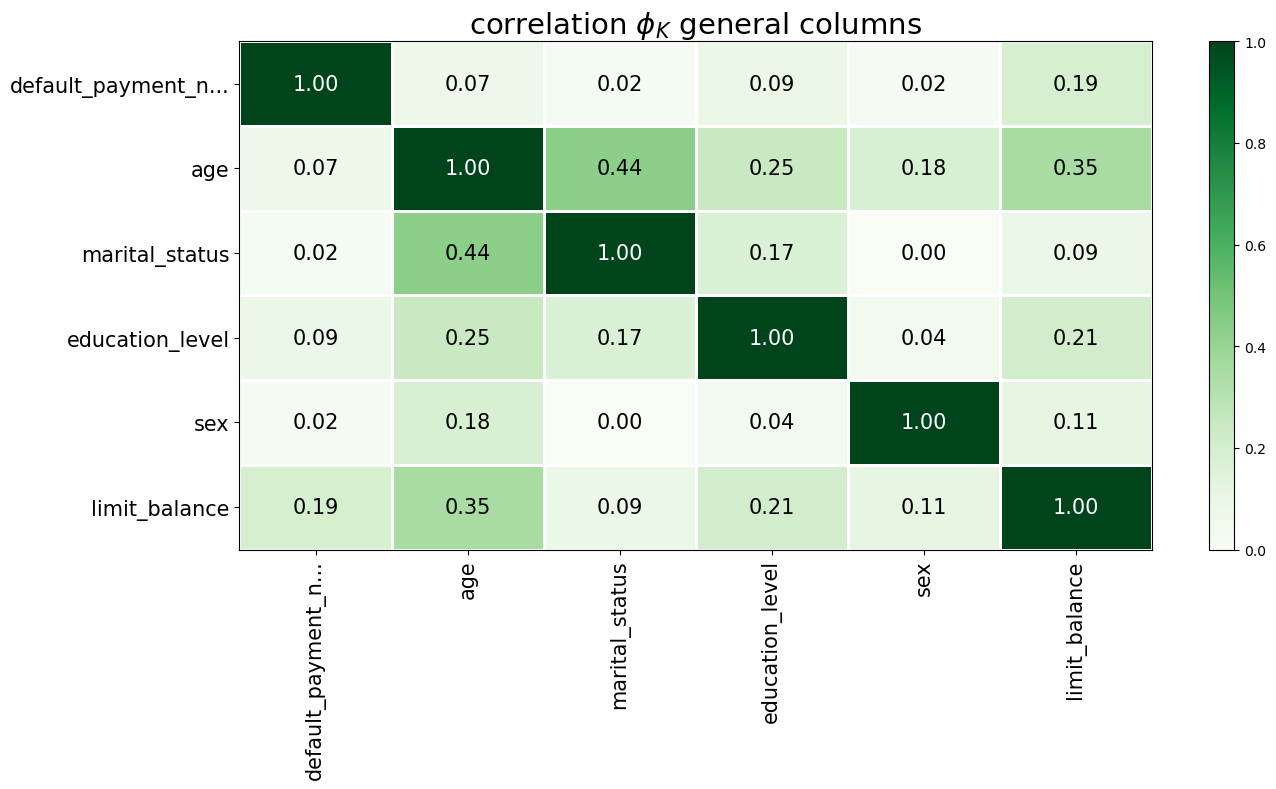

In [12]:
phik_overview = df[colgro_1+['default_payment_next_month']].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ general columns", 
                        fontsize_factor=1.5, 
                        figsize=(14,8))
plt.tight_layout()

From the general group we can see that only limit balance column has correlation value above 0.15. As the assumption stated on the beginning of the section, we will use this one of our feature for modelling.

interval columns not set, guessing: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


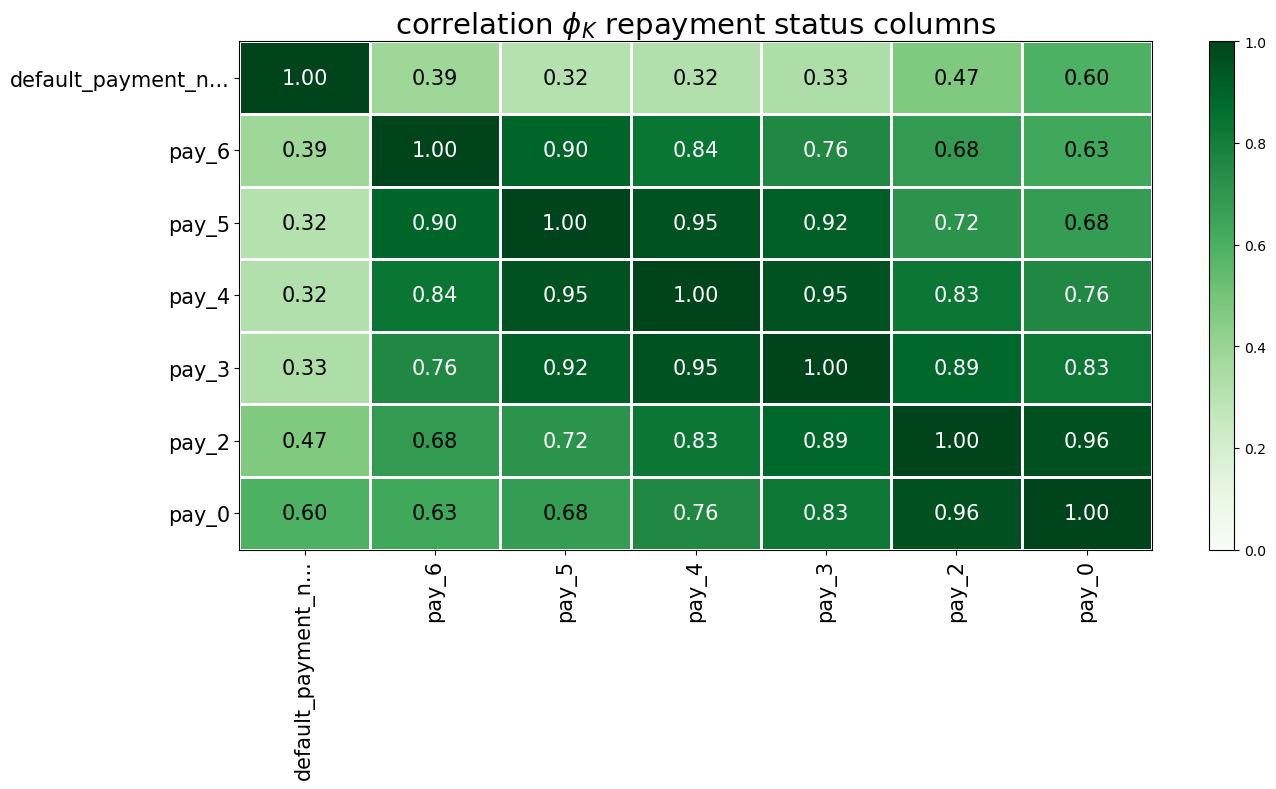

In [13]:
phik_overview = df[colgro_2+['default_payment_next_month']].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ repayment status columns", 
                        fontsize_factor=1.5, 
                        figsize=(14,8))
plt.tight_layout()

Next group column is the repayment status group. We can see that all the columns has higher than 0.15 phik correlation value. So, we will use all these features as our features.

interval columns not set, guessing: ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'default_payment_next_month']


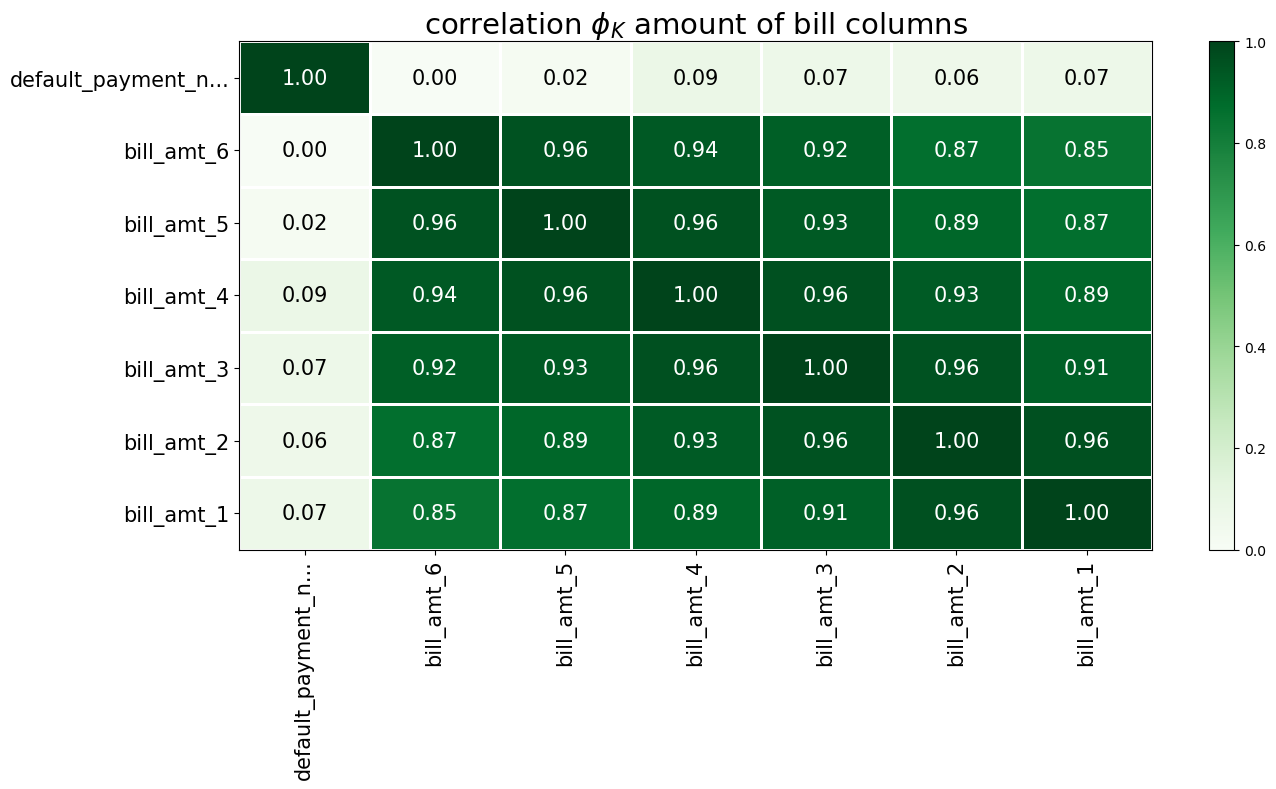

In [14]:
phik_overview = df[colgro_3+['default_payment_next_month']].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ amount of bill columns", 
                        fontsize_factor=1.5, 
                        figsize=(14,8))
plt.tight_layout()

Next group is the amount of bill columns. In this group there isn't one with phik correlation value higher than 0.15, so we will not use any of these columns.

interval columns not set, guessing: ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


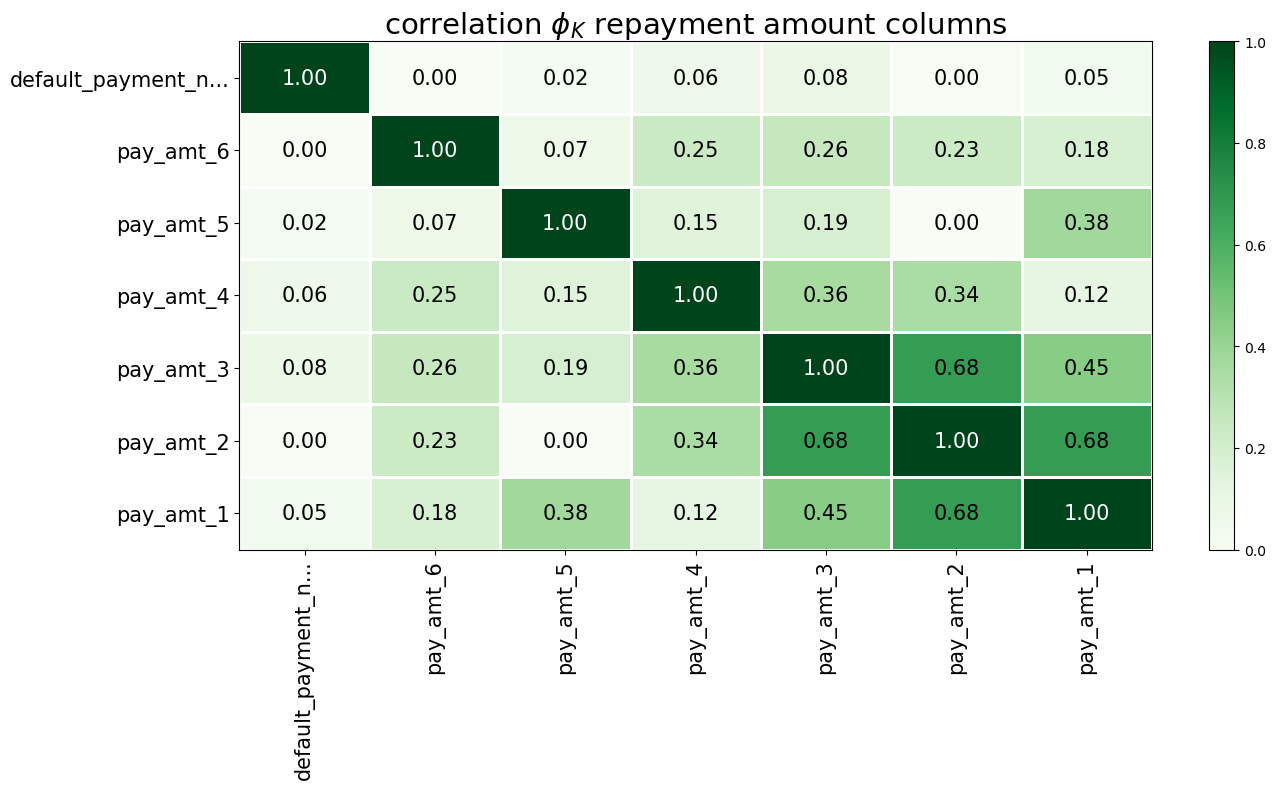

In [15]:
phik_overview = df[colgro_4+['default_payment_next_month']].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ repayment amount columns", 
                        fontsize_factor=1.5, 
                        figsize=(14,8))
plt.tight_layout()

Next, is the repayment amount columns. Same as the previous group, this group doesn't have any that have phik correlation value higher than 0.15, so we will not use any of these columns.

The conclusion for this is that we will use only 7 columns as our feature for modelling. These features are the payment status group and the limit balance or the name of columns in our dataset are 'limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'.

## Payment Status Group

In payment status group we have 6 columns ('pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'). This column name represent payment status for several month.
- pay_0 = Repayment status in September, 2005
- pay_2 = Repayment status in August, 2005
- pay_3 = Repayment status in July, 2005
- pay_4 = Repayment status in June, 2005
- pay_5 = Repayment status in May, 2005
- pay_6 = Repayment status in April, 2005

The value for this columns is (-2) - 9. These numbers represent the status of customers payment.  ((-2) - 0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)



Since the value for payment status group is categorical and already encoded, we will not handle the outliers and will not encode these columns. We will only see the count for each column categorical value.

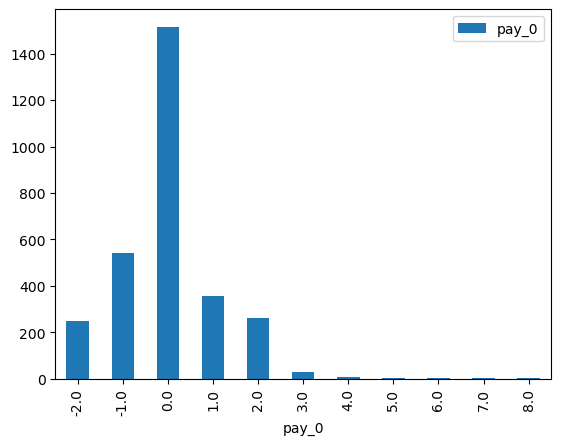

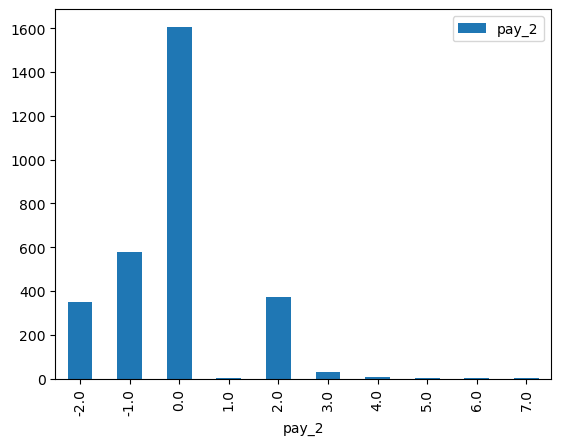

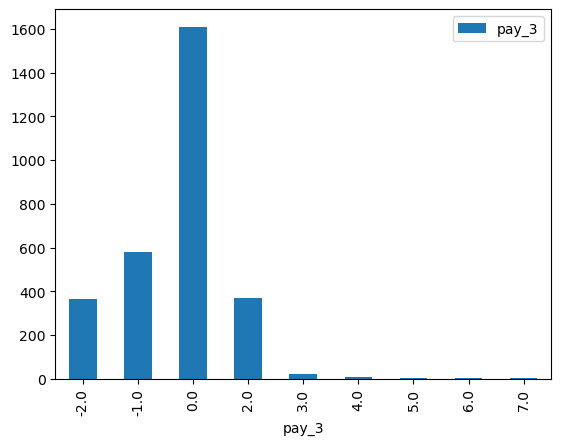

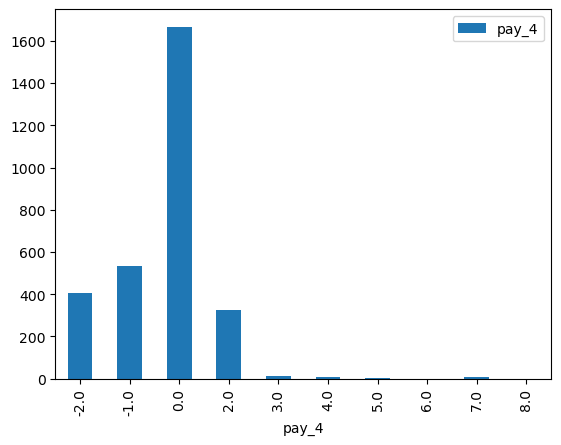

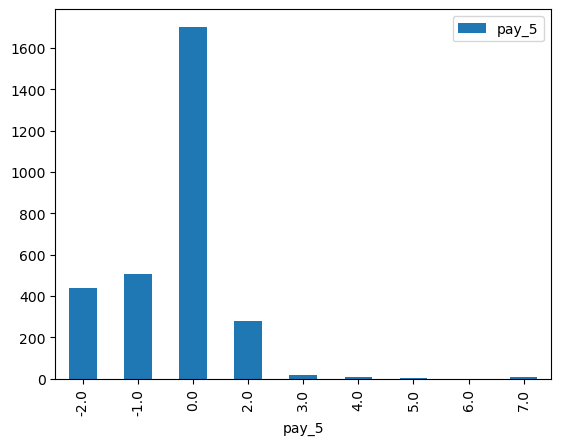

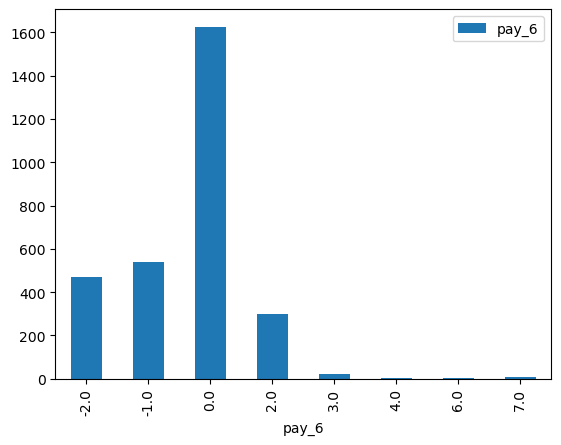

In [16]:
for col in df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].columns:
    df.groupby(col)[[col]].agg('count').plot(kind='bar')

From all the bar plot, we can see that majority of our data has 0 payment status (pay duly). The ideal status for credit card customers is (-2) - 0 which means the customers pay the bill on time.

In [17]:
df.groupby('pay_0')[['pay_0']].agg('count')

,pay_0
pay_0,
-2.0,247
-1.0,540
0.0,1516
1.0,355
2.0,262
3.0,29
4.0,7
5.0,2
6.0,1


In [18]:
df.groupby('pay_2')[['pay_2']].agg('count')

,pay_2
pay_2,
-2.0,352
-1.0,580
0.0,1607
1.0,4
2.0,374
3.0,32
4.0,8
5.0,2
6.0,2


In [19]:
df.groupby('pay_3')[['pay_3']].agg('count')

,pay_3
pay_3,
-2.0,366
-1.0,580
0.0,1610
2.0,368
3.0,22
4.0,8
5.0,3
6.0,4
7.0,3


In [20]:
df.groupby('pay_4')[['pay_4']].agg('count')

,pay_4
pay_4,
-2.0,407
-1.0,532
0.0,1667
2.0,324
3.0,14
4.0,7
5.0,5
6.0,1
7.0,6


In [21]:
df.groupby('pay_5')[['pay_5']].agg('count')

,pay_5
pay_5,
-2.0,440
-1.0,504
0.0,1702
2.0,280
3.0,19
4.0,9
5.0,2
6.0,1
7.0,7


In [22]:
df.groupby('pay_6')[['pay_6']].agg('count')

,pay_6
pay_6,
-2.0,469
-1.0,540
0.0,1626
2.0,297
3.0,21
4.0,2
6.0,3
7.0,6


Above, we can see the count for each month payment status of customers. All the data showed that majority of our customers are paying on time (status (-2) - 0) but few of them are late (status 1 - 8).

## Limit Balance

The next feature we want to explore is the limit balance column. First, we want to look at the statistical overview of this column.

In [23]:
df['limit_balance'].describe()

count      2964.000000
mean     163356.950067
std      125049.701016
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

Here, we can see that the max value of our data is far above the median. From this overview, we can say that our data is not normally distributed. But, we will plot the histrogram and calculate the skewness of this column.

1.0006047564306488

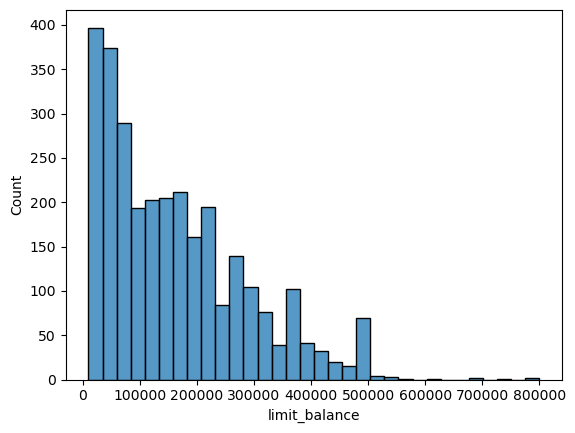

In [24]:
sns.histplot(df['limit_balance']);
df['limit_balance'].skew()

If we look at the histogram we can say that this column data is right skewed. We can see the skewness of this column data is 1.0, which is moderately skewed. This skewness and distribution will determine how we will handle the outliers of this column. Since the skewness is higher than 0.5 we will handle the outliers using IQR method later on the outliers handling section.

## Default Payment Next Month

We already explored all the features that will be used. Now, we want to explore the target column. First, we will look at the unique value.

In [25]:
df['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

Since the unique values are only 2, we can say that this column is categorical column. Next, we want to know the value count on each unique value.

In [26]:
df.groupby('default_payment_next_month')[['default_payment_next_month']].value_counts()

default_payment_next_month
0    2329
1     635
dtype: int64

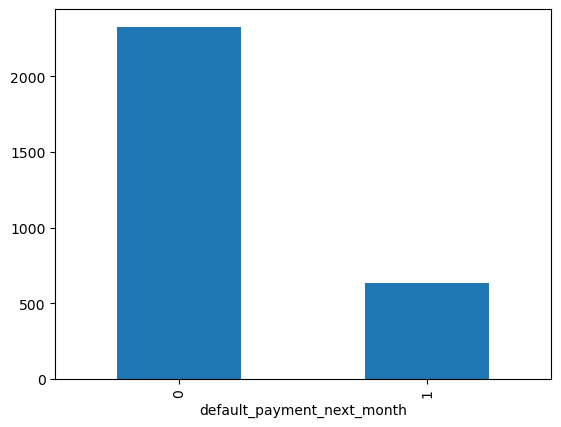

In [27]:
df.groupby('default_payment_next_month')[['default_payment_next_month']].value_counts().plot(kind='bar');

In [28]:
per_min = (635/(2329+635))*100
print(f'percentage of target yes/(1) : {round(per_min,2)} %')

percentage of target yes/(1) : 21.42 %


Here, we can see that the 0 value is higher than 1 value. On the dataset description we know that 0 means no and 1 means yes. So, the value count is understandable that the 0 values is much higher than the 1 values since most of the customers are not defaulting on the credit card payment. In this data we only have 21% of target with yes value/(1).

But, this data shows that we have an imbalanced target. This kind of data is challenging for us to create an optimal model. The results of and imbalanced data usually is low recall on the minority target (in this case, yes/'1'). 

# 5 - Data Preprocessing

## Feature Selection

Feature selection for this model is based on the phik correlation that was calculated on EDA section. That calculation resulting in us using only 7 features and 1 target. These columns are 'limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', and target column 'default_payment_next_month'.

In [29]:
# New dataframe variable for modelling

data_train_test = df[['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default_payment_next_month']]
data_train_test

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,230000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,230000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2959,30000.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,1
2960,20000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0
2961,280000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,0
2962,360000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,0


## Splitting Dataset

Next step is splitting the dataset into X (features) and y (target).

In [30]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
X

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,130000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,230000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2959,30000.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0
2960,20000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
2961,280000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
2962,360000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0


Next, we want to split each X and y data into train and test data. We set the train data 80% from data total so we have enough data for model training.

In [31]:
# Split between Train-Set and Test-Set
# Stratify y to balance the target value in each split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2371, 7)
Test Size  :  (593, 7)


Now that we have split the data into x_train, x_test, y_train, and y_test, we can proceed to the next section, handling outlier.

## Handling Outlier

In this section we will handle the outliers in our data. All the features column is already numerical value, but the payment status columns are considered categorical value. So, the column that outliers will be handled in this section is only one, that is the limit balance column.

1.0

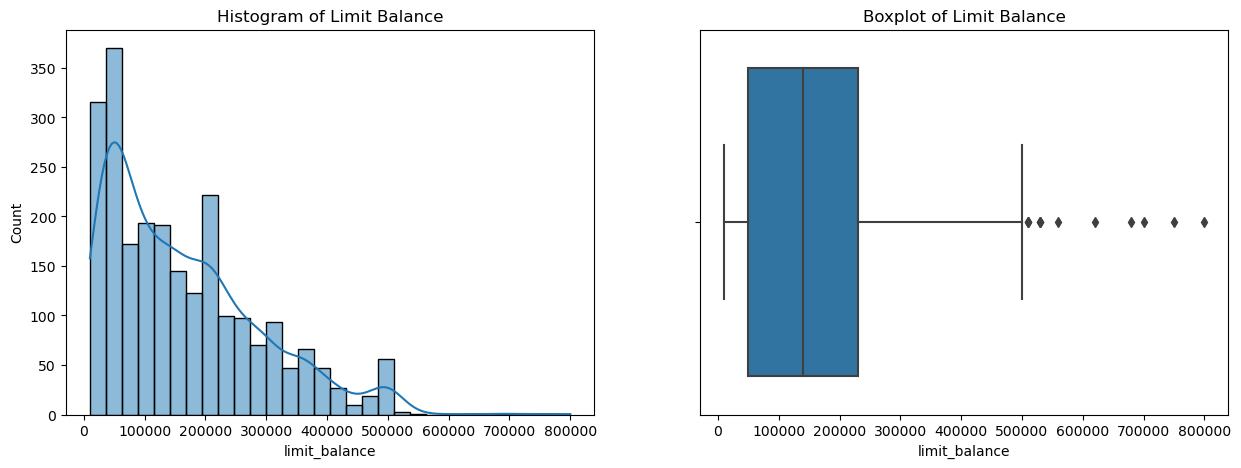

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(X_train['limit_balance'], bins=30,kde=True)
plt.title('Histogram of Limit Balance')

plt.subplot(1,2,2)
sns.boxplot(X_train['limit_balance'])
plt.title('Boxplot of Limit Balance');

df['limit_balance'].skew().round(2)

We can see the distribution of this column is right skewed with 1.0 skewness. This number tells us that our data is moderately skewed. This can also be seen in our boxplot. We can see that there are some outliers in our limit balance column. Next, we want to check how many outliers in the column.

In [33]:
# Calculate quartiles
quartiles = percentile(X_train['limit_balance'], [25, 50, 75])
# Calculate min/max
fav_min, fav_max = X_train['limit_balance'].min(), X_train['limit_balance'].max()

q1 = quartiles[0]
q2 = quartiles[1] # median
q3 = quartiles[2]

# Print 5-number summary
print('Min: %.3f' % fav_min)
print('Q1: %.3f' % q1)
print('Median: %.3f' % q2)
print('Q3: %.3f' % q3)
print('Max: %.3f' % fav_max)

Min: 10000.000
Q1: 50000.000
Median: 140000.000
Q3: 230000.000
Max: 800000.000


In [34]:
# IQR = Q3 - Q1
iqr = q3 - q1

# Upper boundaries = Q3 + 1.5*IQR         
up_bound = q3 + 1.5*iqr               # skewness = 1.0 use 1.5 as IQR factor for boundary

# Lower boundaries = Q1 - 1.5*IQR
lo_bound = q1 - 1.5*iqr

print('IQR = ', iqr)
print('Upper Boundary = ', up_bound)
print('Lower Boundary = ', lo_bound)

IQR =  180000.0
Upper Boundary =  500000.0
Lower Boundary =  -220000.0


After calculating the upper boundary of our data, we will check how many data is outside of our boundary limit.

In [35]:
lb_outliers = X_train[(X_train['limit_balance'] > 500000.0) | 
                      (X_train['limit_balance'] < -220000.0)]
lb_outliers

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
933,510000.0,0.0,0.0,0.0,0.0,0.0,0.0
523,700000.0,0.0,0.0,0.0,0.0,0.0,0.0
923,680000.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,800000.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0
1780,530000.0,-2.0,-2.0,-1.0,0.0,0.0,0.0
1794,530000.0,-2.0,-2.0,-2.0,-2.0,-1.0,0.0
734,560000.0,0.0,0.0,0.0,0.0,0.0,0.0
606,530000.0,0.0,0.0,0.0,0.0,0.0,0.0
446,510000.0,0.0,0.0,2.0,0.0,0.0,0.0
2845,620000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


We have 12 data that is considered outliers. Now we want to know this number compared to our total train data.

In [36]:
print(f'outliers percentage : {round(len(lb_outliers)/len(X_train) * 100,2)} %')

outliers percentage : 0.51 %


It is only 0.5 percent of all our X train data. So, it is safe to remove the outliers entries.

In [37]:
# Dropping outliers index from x train and y train variable

X_train.drop(index=lb_outliers.index,inplace=True)
y_train.drop(index=lb_outliers.index,inplace=True)

In [38]:
print(f'X train length : {len(X_train)}')
print(f'y train length : {len(y_train)}')

X train length : 2359
y train length : 2359


Now, both our X and y train data have the same amount of data so we can continue our process.

## Handling Missing Values

Next, we will check whether there are missing values in our data.

In [39]:
# Check Missing Values on X_train

X_train.isnull().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
dtype: int64

In [40]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [41]:
# Check Missing Values on X_test

X_test.isnull().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
dtype: int64

In [42]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

From here, we know that there are no missing values in our data. So, we can continue to the next section Splitting the Data.

## Split between Numerical Columns and Categorical Columns

Next, we split the data into numerical and categorical columns.

In [43]:
# Get Numerical Columns and Categorical Columns

num_columns = ['limit_balance']
cat_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance']
Categorical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Next, we split the train and test data based on column types.

In [44]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Now that we have split the train-test data based on column type, we can continue to the next section, Feature Scaling and Encoding.

## Feature Scaling

First, we want to see the x train data with numerical columns.

In [45]:
# Display X_train_num

X_train_num

,limit_balance
996,50000.0
1572,30000.0
859,50000.0
2424,200000.0
1029,150000.0
...,...
1130,110000.0
1856,360000.0
459,50000.0
2262,110000.0


In [46]:
X_train['limit_balance'].skew()

0.894407045712482

There is only one column, the limit balance column. For the scaling, we will choose the MinMaxScaler method because the data is not normaly distributed.

In [47]:
# Scaling numerical features inside data train and test

scaler = MinMaxScaler()     # using min max scaler because of the distribution of data is not really normal
scaler.fit(X_train_num)     # fitting scaler on our data

X_train_num_scaled = scaler.transform(X_train_num)     # transforming x train numerical data
X_test_num_scaled = scaler.transform(X_test_num)       # transforming x test numerical data

X_train_num_scaled

array([[0.08163265],
       [0.04081633],
       [0.08163265],
       ...,
       [0.08163265],
       [0.20408163],
       [0.65306122]])

We now have the value for scaled num columns. Now, we can proceed to encoding categorical columns.

## Feature Encoding

In [48]:
# Showing categorical columns

X_train_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
996,0.0,0.0,2.0,0.0,0.0,0.0
1572,2.0,2.0,0.0,0.0,0.0,0.0
859,0.0,0.0,0.0,0.0,0.0,0.0
2424,-1.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1130,0.0,0.0,0.0,2.0,0.0,0.0
1856,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
459,0.0,0.0,2.0,0.0,0.0,0.0
2262,1.0,-2.0,-1.0,0.0,-1.0,-1.0


All our categorical columns are already encoded, so we will not do feature encoding in this notebook.

## Concate between Numerical Columns and Categorical Columns

Now that we have encoded and scaled each column in our data, we want to concate both of them to have them in the same table variable.

In [49]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[ 0.08163265,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04081633,  2.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08163265,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08163265,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20408163,  1.        , -2.        , ...,  0.        ,
        -1.        , -1.        ],
       [ 0.65306122, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

Next, we want to know what columns exist in our new data.

In [50]:
num_columns

['limit_balance']

In [51]:
cat_columns

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Finalize the x train dataframe.

In [52]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_train_final_df

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.081633,0.0,0.0,2.0,0.0,0.0,0.0
1,0.040816,2.0,2.0,0.0,0.0,0.0,0.0
2,0.081633,0.0,0.0,0.0,0.0,0.0,0.0
3,0.387755,-1.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2354,0.204082,0.0,0.0,0.0,2.0,0.0,0.0
2355,0.714286,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2356,0.081633,0.0,0.0,2.0,0.0,0.0,0.0
2357,0.204082,1.0,-2.0,-1.0,0.0,-1.0,-1.0


## VIF

Before we continue to model definition, we want to know if all the features selected don't have multi-colinearity. Since VIF can only be calculated for numerical columns, we calculate the vif after we have all our data ready for modelling (scaled and encoded). First we define a function for calculating each vif and putting it in a dataframe of vif. And then, we use the function to show the VIF value for each features.

In [53]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(X_train_final_df)

,variables,VIF
0,"(limit_balance,)",1.138752
1,"(pay_0,)",1.764513
2,"(pay_2,)",3.066150
3,"(pay_3,)",3.381535
4,"(pay_4,)",4.230374
5,"(pay_5,)",4.917432
6,"(pay_6,)",3.370583


Here, we can see that all features have lower than 5 VIF value and we can say that our features doe't have multi-colinearity. Now that we have transformed the data and checked the multi colinearity, we can continue to our next section, Model Definition.

# 6 - Model Definition

In this assignment, we will use baseline of 7 algorithm and will compare them using cross validation method. These algorithm are logistic regression, SVM classifier, Decision Tree classifier, Random Forest Classifier, KNN Classifier, Naive Bayes , and Adaboost Classifier. The metric that will be focused for comparing these models is Recall. Because ideally, we don't want any defaults to falls through the cracks, so our optimal model will minimize the False Negatives which means Recall score as high as possible.

In [55]:

# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=69)
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining Naive Bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()

# 7 - Cross Validation

In this section we compare the 7 models using cross validation technique and find the best model with the highest recall score.

In [56]:
# Setting skfold value for cv number of splits 
skfold=StratifiedKFold(n_splits=10,random_state=93,shuffle=True)

In [57]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.         0.         0.39215686 0.         0.         0.
 0.         0.         0.         0.        ]
recall - Mean - Cross Validation :  0.0392156862745098
recall - Std - Cross Validation  :  0.1176470588235294
recall - Range of Test-Set       :  -0.07843137254901959 - 0.1568627450980392
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
recall - Mean - Cross Validation :  0.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  0.0 - 0.0
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.44       0.33333333 0.29411765 0.2745098  0.52941176 0.2745098
 0.47058824 0.37254902 0.31372549 0.4       ]
recall - Mean - Cross Validation :  0.37027450980392157
recall - Std - Cross Validation  :  0.0835715257914231
recall - Range of Test-Set       :  0.2867029840124985 - 0.45384603559534464
----------

Our cross validation comparison results the best model is rf_model or Random Forest Classifier model with the mean of recall is 0.40. After we get the best model, we will focus on this one for further in the notebook. To get a record of the baseline model metric score, we will do the normal fit and predict without cross validation.

## Baseline Random Forest Classifier

In [58]:
# Baseline Model using Random Forest Algorithm

rf_model = RandomForestClassifier(random_state=169)
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=169)

Recall Score - Train Set  :  0.6830708661417323 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1851
           1       0.92      0.68      0.78       508

    accuracy                           0.92      2359
   macro avg       0.92      0.83      0.87      2359
weighted avg       0.92      0.92      0.91      2359
 

Confusion Matrix      : 


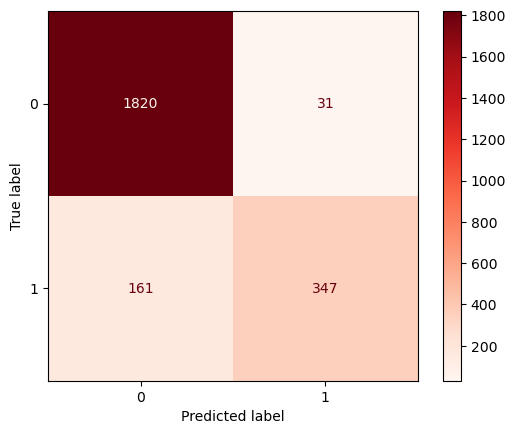

In [59]:
# Check Performance Model against Train-Set

y_pred_train = rf_model.predict(X_train_final)

print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_train_final, y_train, cmap='Reds'))

Recall Score - Test Set  :  0.4094488188976378 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       466
           1       0.55      0.41      0.47       127

    accuracy                           0.80       593
   macro avg       0.70      0.66      0.67       593
weighted avg       0.78      0.80      0.79       593
 

Confusion Matrix      : 


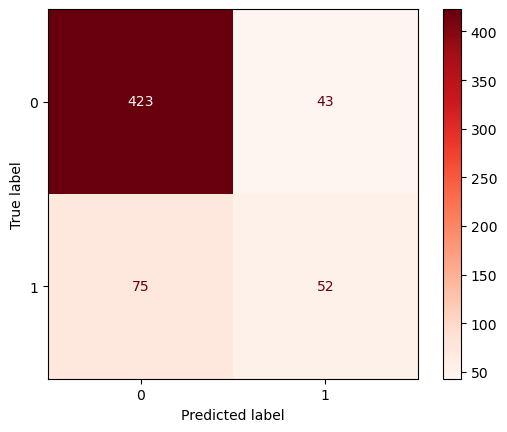

In [60]:
# Check Performance Model against Test-Set

y_pred_test = rf_model.predict(X_test_final)

print('Recall Score - Test Set  : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final, y_test, cmap='Reds'))

In [61]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.801012
test - f1_score,0.468468
test - precision,0.547368
test - recall,0.409449
train - accuracy,0.918610
train - f1_score,0.783296
train - precision,0.917989
train - recall,0.683071


We already stated that we want to focus on the recall score. The baseline random forest classifier model achieved 0.68 recall score on train data and 0.40 recall score on test data. Now that we get the baseline model metric scores, we can conclude that the baseline model for random forest classifier model is highly overfit for this data. This is not surprising because we know that treebased model without hyperparameter (baseline) is tend to be overfit. In the next section, we will find the best hyperparameter for the Random Forest Classifier using RandomSearchCV.

# 8 - Parameter Tuning

In this section we will tune the hyperparameter for our Random Forest Classifier model. We search the best hyperparameter using RandomSearchCV. First, we define the randomizer for the RandomSearchCV and then we will fit the model to the training data to find the best hyperparameter.  

In [62]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

Here, we can see the parameters that will be trialled randomly by our model. Next, we fit the train data using the parameters defined. 

In [63]:
# Train with Random Search

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=69), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='recall')

In [64]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

Here, we can see the best hyperparameter after using the RandomSearchCV. The best parameters that we get are:
- 'n_estimators': 200,
- 'min_samples_split': 2,
- 'min_samples_leaf': 4,
- 'max_features': 'auto',
- 'max_depth': 10,
- 'criterion': 'entropy'

In [65]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_
rf_randomcv_best

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=200, random_state=69)

# 9 - Model Evaluation

After we get best estimator, we use the model with the best hyperparameters to predict on train and test data.

Recall Score - Train Set   :  0.43700787401574803 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1851
           1       0.77      0.44      0.56       508

    accuracy                           0.85      2359
   macro avg       0.82      0.70      0.73      2359
weighted avg       0.84      0.85      0.83      2359
 

Confusion Matrix      : 


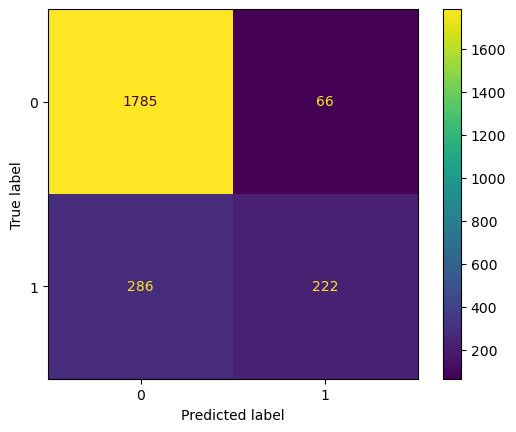

In [66]:
# Check Performance Model against Train-Set

y_pred_train_best = rf_randomcv_best.predict(X_train_final)

print('Recall Score - Train Set   : ', recall_score(y_train, y_pred_train_best), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train_final, y_train))

Recall Score - Test Set   :  0.4409448818897638 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       466
           1       0.67      0.44      0.53       127

    accuracy                           0.83       593
   macro avg       0.77      0.69      0.72       593
weighted avg       0.82      0.83      0.82       593
 

Confusion Matrix      : 


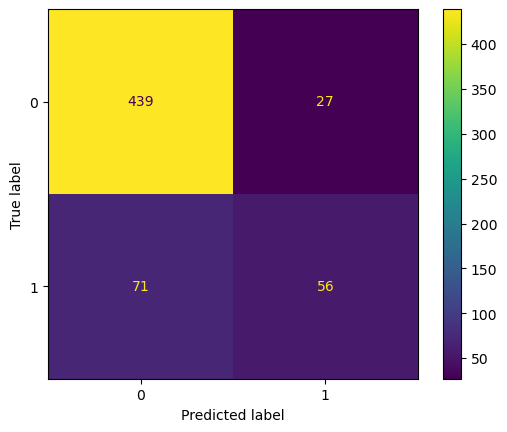

In [67]:
# Check Performance Model against Test-Set

y_pred_test_best = rf_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_best), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test))

In [68]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_best),
    'train - recall' : recall_score(y_train, y_pred_train_best),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_best),
    'train - f1_score' : f1_score(y_train, y_pred_train_best),
    'test - precision' : precision_score(y_test, y_pred_test_best),
    'test - recall' : recall_score(y_test, y_pred_test_best),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_best),
    'test - f1_score' : f1_score(y_test, y_pred_test_best),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.917989,0.770833
train - recall,0.683071,0.437008
train - accuracy,0.918610,0.850784
train - f1_score,0.783296,0.557789
test - precision,0.547368,0.674699
test - recall,0.409449,0.440945
test - accuracy_score,0.801012,0.834739
test - f1_score,0.468468,0.533333


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.43 recall score on the train data and 0.44 recall score on the test data. We can see the result of the tuned model is not overfit like the baseline model. 

# 10 - Conclusion

Based on what we have done in this notebook, we can get some conclusion:

1. **The dataset is about credit card default payment** with **imbalanced target classes** (minority class (default/'1') only 21% of all classes). 

2. In this model creation we are **focusing** our metrics on **recall score** because ideally, we don't want any defaults to falls through the cracks (default customers predicted as non default), so our optimal model will **minimize the False Negatives** which means **Recall score as high as possible**.

3. After comparing 7 baseline model (logistic regression, SVM classifier, Decision Tree classifier, Random Forest Classifier, KNN Classifier, Naive Bayes , and Adaboost Classifier) using cross validation, we get **the best baseline model which is Random Forest Classifier** with **mean recall score 0.39**.

4. We used the best model according to the cross validation comparison (**Random Forest Classifier**) to be **tuned further using RandomSearchCV**. We get the best hyperparameter for this model which is:
    - 'n_estimators': 200,
    - 'min_samples_split': 2,
    - 'min_samples_leaf': 4,
    - 'max_features': 'auto',
    - 'max_depth': 10,
    - 'criterion': 'entropy'

5. We compared the baseline Random Forest Classifier model and the tuned Random Forest Classifier model score. **The baseline model is highly overfit** because we know the **baseline of treebased model** is tend to have high **recall score (0.7)** on train data and low **recall score (0.40)** on the test data (**overfit**). On the other hand, **the tuned model is not overfit like the baseline model**. The tuned model achieve almost the same score on recall on both train and data test. For tuned model, **the train recall score is 0.437** and **the test recall score is 0.440**. The train and test score is very close which means **the tuned model is best fit for the dataset**. Although **the score is quite low**, it is probably **caused by the imbalance of our target** class on the dataset.

# 11 - Model Saving

In [69]:
# Model Saving


with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_rf_best.pkl', 'wb') as file_2:
  pickle.dump(rf_randomcv_best, file_2)

with open('list_num_columns.txt', 'w') as file_3:
  file_3.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_4:
  file_4.write(str(cat_columns))

# Conceptual Problems

**Question 1**

Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini!

**Answer 1**

Criterion is a function that measures the quality of a split in the tree. The goal of the criterion is to minimize the impurity or the error of the tree by selecting the best split at each node. There are 3 criterion that can be chosen, gini, entropy, and log_loss.

**Question 2**

Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll)!

**Answer 2**

Pruning is a process of removing branches from a tree based model. The more the branches, the more complex the model will be. By reducing branches the model will reduce the complexity and the classifier will be more general. It is one of the way to reduce overfitting in tree based model. There are two types of pruning, Pre-pruning and post-pruning. Prepruning is the process of stopping the tree growing process by setting a stopping condition or maximum tree depth. Pre-pruning can be done by setting the hyperparameter for the model. Post-pruning is the process of removing branches from a finished tree model. It is done after the model has been built. By removing branches will increase the generalization of the model.

**Question 3**

Bagaimana cara memilih K yang optimal pada KNN?

**Answer 3**

To choose the optimal value of K for KNN model, we can use the elbow method. Elbow method is a graphical representation of the performance of the model for different values of k. It plots the value of k against the error rate, and the optimal value of k is chosen at the point of maximum change or "elbow" in the graph. 

**Question 4**

Jelaskan apa yang dimaksud dengan Cross Validation!

**Answer 4**

Cross validation is a technique used to evaluate the performance of a model by dividing the originial training data into training and testing set (validation set). The goal of cross validation is to estimate the performance of the model on a new data because the output of cross validation is several model score based on the number of fold chosen.

**Question 5**

Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

**Answer 5**

Accuracy, precision, recall, and f1-score are metrics that is used by classification model.
- Accuracy is a metric that calculates the proportion of correct predictions made by the model out of all prediction made. It is defined as the ratio of correct predictions to total predictions. Accuracy is best used when the class target is balanced.

- Precision is a metric that calculates the proportion of true positive predictions made by the model out of all positive predictions made. It is defined as the ratio of true positives to true postitives plus false positives. Precision is best used when the cost of false positive is high such as in a medical diagnosis (to measure the proportion of true positives among all patients who have been diagnosd with a disease). Precision also best used when the class is imbalance. Precision can be a good measure for the minority class.

- Recall is a metric that calculates the porportion of true positive predictions made by the model out of all actual positive observations. It is defined as the ratio of true positives to true positives plus false negatives. Recall is best used when the cost of false negative is high such as in fraud detection (to measure the proportion of fraud cases that are correctly identified by the model among all actual fraud cases). Recall also best used when the class is imbalance. Recall can be a good measure for the minority class.

- f1-score is the harmonic mean of precision and recall. f1-score usually used to balance the trade-off between precision and recall. It is defined as 2*(precision*recall)/(precision+recall). f1-score is best used when the cost of false positive and false negative are equal. f1-score can also be used when the class is imbalance. f1-score can be used to balance the weight of precision and recall.